In [24]:
from src.models.modulated_siren import ModulatedSirenModel
from src.datasets.chairs import get_mgrid
import torch

In [49]:
from src.models.modulated_siren import ModulatedSirenModel
import pytorch_lightning as pl

# Create an instance of the ModulatedSirenModel
model = ModulatedSirenModel(in_features=2, hidden_features=256, hidden_layers=2, out_features=3, outermost_linear=True, first_omega_0=30, hidden_omega_0=30.)

# Load the checkpoint
checkpoint_path = "/home/arkadi.piven/Code/functa/checkpoints/two_chairs_fully_fledged_meta_learning/last.ckpt"
model = model.load_from_checkpoint(checkpoint_path, in_features=2, hidden_features=256, hidden_layers=15, out_features=3, outermost_linear=True, first_omega_0=30, hidden_omega_0=30.)

Chairs dataset initialized
tensor([[-1.0000, -1.0000, -1.0000],
        [-0.9922, -0.9922, -0.9922],
        [-1.0000, -1.0000, -1.0000],
        ...,
        [-1.0000, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000]])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[-0.9964, -0.9963, -0.9966],
        [-0.9964, -0.9963, -0.9965],
        [-0.9964, -0.9963, -0.9965],
        ...,
        [-0.9963, -0.9963, -0.9966],
        [-0.9964, -0.9964, -0.9967],
        [-0.9965, -0.9965, -0.9967]], grad_fn=<AddmmBackward0>)


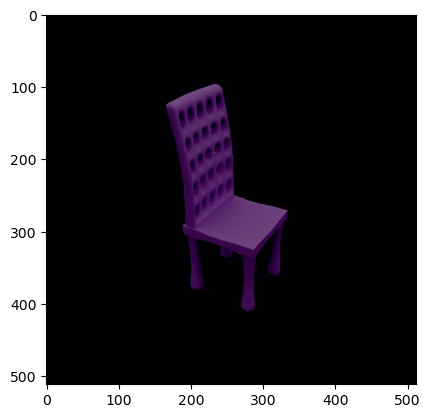

In [50]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from src.datamodules.chairs_datamodule import ChairsDatamodule
import torchvision. transforms as T
from PIL import Image

# Define the grid
chairs = ChairsDatamodule("/home/arkadi.piven/Code/functa/rendered/chair", 1)
transform = T.ToPILImage()
coords, pixels = chairs.train_dataset[1]
coords = get_mgrid(512, 2)
print(pixels)

# # Pass the coordinates through the model
output = model(coords)
print(output)


# Reshape the output to (512, 512, 3)
# print(output.shape)

# # Plot the image
plt.imshow(output.view(512,512,3).detach().numpy())
plt.imshow(pixels.view(512,512,3).detach().numpy())

# plt.show()

## Train latent and visualize

BEGIN OF TRAINING PHI Parameter containing:
tensor([ 8.3403e-04, -5.1807e-04, -2.3076e-05,  1.9441e-04,  2.3363e-04,
        -1.2569e-04, -3.6281e-04, -8.3557e-05,  8.8931e-05, -7.3329e-04,
         9.8459e-05,  5.3096e-04,  1.9173e-04,  4.3565e-04, -2.0523e-04,
         3.6184e-04,  1.1424e-03,  1.5336e-04,  6.1194e-04, -4.6597e-04,
        -4.3987e-05,  2.2128e-04, -1.3438e-05,  1.9014e-05, -3.5931e-04,
        -4.6662e-04, -3.7929e-04,  4.2327e-04, -3.7586e-05,  1.4831e-04,
         1.3797e-04,  3.5495e-04, -6.4030e-05,  9.5571e-04, -9.9633e-05,
        -3.4696e-04, -1.5923e-04, -1.2989e-04,  7.6794e-04, -3.7138e-04,
        -2.9935e-04,  5.5977e-04,  3.4415e-04, -8.5608e-04, -5.6417e-05,
        -3.3845e-04,  1.9896e-04,  2.3383e-06, -3.8227e-04,  1.5840e-04,
        -2.1029e-04, -9.8460e-04, -3.7317e-04, -9.9716e-06,  7.8716e-05,
         2.1326e-04,  3.9482e-05, -3.0968e-04, -7.4108e-05,  1.7203e-04,
        -4.6244e-04, -3.9510e-04,  3.7890e-04,  1.8795e-04,  4.2878e-04,
       

  0%|          | 0/3 [00:00<?, ?it/s]

START PHI: Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.,

 33%|███▎      | 1/3 [00:25<00:51, 25.68s/it]

END PHI: Parameter containing:
tensor([-1.5094e-03,  1.3943e-03, -6.2335e-04, -6.2818e-04, -5.2216e-04,
        -2.3091e-04,  1.0207e-03,  5.5720e-04,  3.2521e-04,  1.1344e-03,
        -3.9462e-04, -1.0743e-03, -1.6280e-04,  2.6423e-05,  5.5010e-04,
         3.1432e-04, -3.4505e-04, -4.8073e-04,  2.9793e-04, -4.5836e-04,
        -6.4074e-04, -7.9449e-04, -9.0746e-04,  5.5041e-04,  7.0197e-04,
         5.2416e-04,  1.5997e-03, -9.6482e-05,  6.9872e-04,  1.5581e-05,
         1.8777e-04, -6.0795e-04,  1.4740e-04, -5.0521e-04, -1.9579e-04,
         1.0915e-03,  4.3180e-04,  3.5917e-04, -4.6893e-04,  5.8611e-04,
         1.3629e-03, -1.0267e-03, -1.5823e-03,  2.9292e-05,  6.4434e-04,
         6.8600e-04,  2.2660e-04, -5.2353e-04,  2.3665e-04, -5.7629e-04,
         7.6575e-04,  9.6078e-04,  3.8262e-04, -2.9394e-04, -6.1914e-04,
         1.3848e-04,  2.6327e-04,  3.0021e-04, -1.1380e-03, -5.4558e-04,
         8.7574e-04, -2.1916e-04, -3.5145e-04,  1.1267e-03, -2.9725e-04,
        -8.5644e-04,

 67%|██████▋   | 2/3 [00:51<00:25, 25.60s/it]

END PHI: Parameter containing:
tensor([-5.6304e-03,  5.8814e-03, -1.6975e-03, -3.6221e-03, -1.7307e-03,
        -1.9479e-03,  2.5655e-03,  1.6469e-03,  7.7450e-04,  2.8368e-03,
        -7.6200e-04, -3.6660e-03, -1.2319e-03,  9.9317e-04,  3.0535e-03,
         6.7480e-04, -1.4922e-03, -2.2664e-03,  1.0520e-03, -1.5812e-03,
        -1.7633e-03, -3.3425e-03, -3.3252e-03,  1.4983e-03,  2.8773e-03,
         1.8465e-03,  6.3931e-03,  1.2333e-03,  3.4147e-03,  8.3377e-05,
         1.0628e-03, -2.8863e-03,  1.7129e-03, -1.0747e-03, -2.6091e-03,
         4.6516e-03,  2.1842e-03,  1.9643e-03, -1.3592e-03,  2.7024e-03,
         4.8329e-03, -4.6308e-03, -7.9163e-03, -1.4932e-03,  1.2539e-03,
         2.5956e-03,  9.8821e-04, -2.3655e-03,  8.7892e-04, -1.5265e-03,
         2.6115e-03,  3.3285e-03,  1.6604e-03, -2.2851e-03, -2.0424e-03,
         1.8996e-03,  8.5525e-04,  1.0802e-03, -5.4330e-03, -1.0067e-03,
         2.4158e-03, -1.8156e-03, -1.4948e-03,  5.4390e-03, -1.8883e-03,
        -3.1659e-03,

100%|██████████| 3/3 [01:16<00:00, 25.65s/it]

END PHI: Parameter containing:
tensor([-5.6584e-03,  5.9751e-03, -1.7212e-03, -3.7161e-03, -1.8140e-03,
        -2.0479e-03,  2.7408e-03,  1.7261e-03,  8.0642e-04,  2.8836e-03,
        -8.6360e-04, -3.6833e-03, -1.3323e-03,  1.2113e-03,  3.2261e-03,
         7.5638e-04, -1.3712e-03, -2.3395e-03,  1.2909e-03, -1.7198e-03,
        -1.9113e-03, -3.5043e-03, -3.4695e-03,  1.6179e-03,  3.0075e-03,
         1.9273e-03,  6.5355e-03,  1.4231e-03,  3.6009e-03,  5.1263e-05,
         1.1761e-03, -3.0909e-03,  1.6545e-03, -9.5020e-04, -2.7167e-03,
         4.8751e-03,  2.2862e-03,  2.0511e-03, -1.3339e-03,  2.7942e-03,
         5.1530e-03, -4.8166e-03, -8.2319e-03, -1.7653e-03,  1.1825e-03,
         2.5698e-03,  9.9282e-04, -2.4346e-03,  9.0293e-04, -1.4446e-03,
         2.6701e-03,  3.4671e-03,  1.6715e-03, -2.4534e-03, -2.2140e-03,
         2.0564e-03,  9.3913e-04,  1.1473e-03, -5.6868e-03, -1.0712e-03,
         2.4023e-03, -2.0081e-03, -1.4982e-03,  5.7538e-03, -1.7739e-03,
        -3.1305e-03,


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[-0.9946, -0.9950, -0.9948],
        [-0.9946, -0.9950, -0.9948],
        [-0.9946, -0.9950, -0.9949],
        ...,
        [-0.9956, -0.9958, -0.9960],
        [-0.9957, -0.9959, -0.9961],
        [-0.9958, -0.9959, -0.9962]], grad_fn=<AddmmBackward0>)
torch.Size([262144, 3])


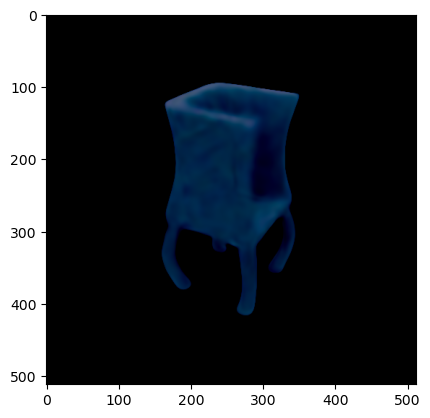

In [52]:
batch = chairs.train_dataset[0]
print(f"BEGIN OF TRAINING PHI {model.phi}")
model.train_latent(batch)
print(f"END OF TRAINING PHI {model.phi}")
coords = get_mgrid(512, 2)

output = model(coords)
print(output)

print(output.shape)

# Plot the image
plt.imshow(output.view(512,512,3).detach().numpy())

plt.show()
